In [15]:
from utils import *
%matplotlib inline

# Gluon `Dataset`s and `DataLoader`


<center><img src="support/data.gif" width=300><center>

## Gluon 

Gluon is a high-level interface for MXNet that provides a clear, concise, and simple API for deep learning.

Let's first import the gluon package.

Basic usage

In [16]:
import mxnet as mx

from mxnet import gluon, nd

One of the most critical steps for model training is loading the data: without data you can't do Machine Learning! 

In Gluon we can define a [`Dataset`](https://mxnet.incubator.apache.org/api/python/gluon/data.html?highlight=dataset#mxnet.gluon.data.Dataset) and use a [`DataLoader`](https://mxnet.incubator.apache.org/api/python/gluon/data.html?highlight=dataloader#mxnet.gluon.data.DataLoader) to iterate through the dataset in mini-batches.

## Dataset 

As a toy example, let’s fill our data and labels with draws from a random uniform distribution

In [17]:
mx.random.seed(42) # Fix the seed for reproducibility
X = mx.random.uniform(shape=(10, 3))
y = mx.random.uniform(shape=(10, 1))


Once we have our data stored as ndarrays, we can simply use `gluon.data.dataset.ArrayDataset` to create the gluon dataset.

In [18]:
dataset = gluon.data.dataset.ArrayDataset(X, y)

key feature of a `Dataset` is the __*ability to retrieve a single sample given an index*__.

We can access data at a particular index in the `Dataset` and it returns the data sample

In [19]:
sample = dataset[4]
sample

(
 [0.74707687 0.37641123 0.46362457]
 <NDArray 3 @cpu(0)>, 
 [0.35440788]
 <NDArray 1 @cpu(0)>)

We get a tuple of a data sample and its corresponding label.

We don't usually retrieve individual samples from Dataset objects though (unless we're quality checking the output samples). Instead we use a DataLoader.

## DataLoader

A `DataLoader` is used to create mini-batches of samples from a Dataset, and provides a convenient iterator interface for looping these batches.

`DataLoader` allows loading data in parallel for maximum performance

A required parameter of DataLoader is the size of the mini-batches you want to create, called batch_size.

Another benefit of using DataLoader is the ability to easily load data in parallel using multiprocessing. You can set the num_workers parameter to the number of CPUs avalaible on your machine for maximum performance, or limit it to a lower number to spare resources.

In [20]:
from multiprocessing import cpu_count
CPU_COUNT = cpu_count()

data_loader = mx.gluon.data.DataLoader(dataset, batch_size=5, num_workers=CPU_COUNT)

for X_batch, y_batch in data_loader:
    print("X_batch has shape {}, and y_batch has shape {}".format(X_batch.shape, y_batch.shape))

X_batch has shape (5, 3), and y_batch has shape (5, 1)
X_batch has shape (5, 3), and y_batch has shape (5, 1)


Sometimes the dataset length isn't divisible by the mini-batch size, leaving a final batch with a smaller number of samples. DataLoader's default behavior is to return this smaller mini-batch, but this can be changed by setting the last_batch parameter to discard (which ignores the last batch) or rollover (which starts the next epoch with the remaining samples)

## Preloaded Datasets

Some datasets like mnist and cifar10 are quite common benchmark datasets in the machine learning community. 

These are already preloaded in gluon and can be created by calling

In [21]:
train_dataset = gluon.data.vision.datasets.MNIST(train=True)
valid_dataset = gluon.data.vision.datasets.MNIST(train=False)

We can visualize the data from the mnist data set

(28, 28, 1)


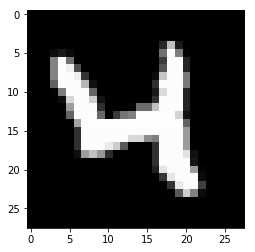

In [22]:
sample_image = train_dataset[20][0]
print(sample_image.shape)
imshow(sample_image[:,:,0].asnumpy(), cmap='gray')

## Data Transformations

We can also easily apply transformations on the dataset

In [23]:
def transform(data, label):
    data = data.astype('float32')/255
    return data, label

train_dataset = gluon.data.vision.datasets.MNIST(train=True, transform=transform)
valid_dataset = gluon.data.vision.datasets.MNIST(train=False, transform=transform)


In [24]:
sample_image = train_dataset[19][0]
nd.max(sample_image)


[1.]
<NDArray 1 @cpu(0)>

`gluon.data.vision.transforms` has implemented transformation functions that are common in computer vision

In [25]:
from mxnet.gluon.data.vision import transforms

## Lazy Transformations

Instead of applying transformations on the dataset, we can lazily apply the transformation when creating the dataloader.

In [26]:
transform = transforms.Compose([transforms.RandomFlipTopBottom(),
                                transforms.RandomFlipLeftRight()])

In [31]:
train_dataloader = gluon.data.DataLoader(train_dataset.transform_first(transform), batch_size=5, shuffle=False)

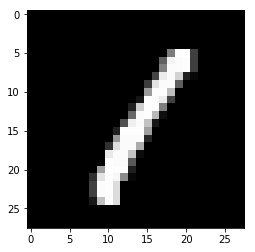

In [38]:
for X_batch, y_batch in train_dataloader:
    imshow(X_batch[3,:,:,0].asnumpy(), cmap='gray')
    break

## Custom `Dataset`s and `DataLoader`s

You can extend the gluon `Dataset` and `DataLoader` class to implement custom handling for your data.

For `Dataset` override the `__init__`, `__getitem__` and `__len__` functions

For `DataLoader` override the `__init` and `__iter__`